# Supervised Learning

We will not focus on understanding the math behind the machine learning techniques. We will focus on understanding basics of machine learning and learning how to implement it while using **python**.

In python there are different ML libraries, including sklearn, keras or tensorflow. In this exercise we will use **sklearn**.

Supervised learning uses data that has labels. Example, there are orthopedic patients data that have labels *normal* and *abnormal*.
* **Variables**: There are features (predictor variable) and target variable
    * Features in our example include *pelvic radius* or *sacral slope*
    * Target variables are labels, *normal* and *abnormal* in our example
* **Goal** is that based on given features (input) predict whether target variable (output) is *normal* or *abnormal*
* **Classification**: target variable consists of categories, e.g. normal or abnormal
* **Regression**: target variable is continious, e.g. stock market

* **Note**:
    * feature = variable = predictor variable = independent variable = column = input 
    * target variable = response variable = class = dependent variable = output = result   

  Contents of this excercise:

     1. [EDA (Exploratory Data Analysis)](#1)
     1. [CLASSIFIATION: K-Nearest Neighbors (KNN)](#2)
         1. [KNN](#3)
         1. [Accuracy](#4)
         1. [Split train and test data](#5)
         1. [Model optimisatation](#6)
         1. [Confusion matrix](#7)
         1. [TODO No. 1: Random Forest (OPTIONAL)](#8)
     1. [REGRESSION](#9)
         1. [Linear regression](#10)
         1. [Regularised regression](#11)
         1. [TODO No. 2: Regression (OPTIONAL)](#12)
     1. [Logistic Regression and ROC Curve](#13)
     1. [Cross validation](#14)
     1. [Hyperparameter tunning](#15)
         1. [TODO No. 3:  Grid search example with 2 hyperparameters](#16)
     1. [Support Vector Machines (SVM)](#17)
         1. [TODO No. 4: Implement SVM for classification and tune hyperparameters](#18)
         1. [TODO No. 5: Implement SVM for regression](#19)
   
   https://scikit-learn.org/stable/model_selection.html
    

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "./input/" directory.


In [3]:
# Load data
data = pd.read_csv('./input/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
sns.set_style('darkgrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<a id="1"></a> <br>
## 1. Exploratory Data Analysis (EDA)
* At the beginning, as you know, you need to explore and prepare data.
* I always start with *head()* to see features, that are in our example *pelvic_incidence,	pelvic_tilt numeric,	lumbar_lordosis_angle,	sacral_slope,	pelvic_radius* and 	*degree_spondylolisthesis*, while target variable is *class*.



In [4]:
# To see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
# Check for NaN values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


As you can see:
* Length: 310 (range index)
* Features are float
* Target variable is object (string)
* Now we have some ideas about data, but lets look go inside data deeper
    * describe(): 
        * Why we need to see statistics like mean, std, max or min? 
        * Answer: In order to visualize data, values should be closer each other. As you can see values looks close. At least there are no incompatible values (e.g. mean of one feature is 0.1 and of other is 1000). 

In [6]:
# Check basic statistics
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Let's now visualise data.

A **scatter plot matrix** is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.
A scatter plot is created for every pairwise combination of variables selected.

pd.plotting.scatter_matrix:
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

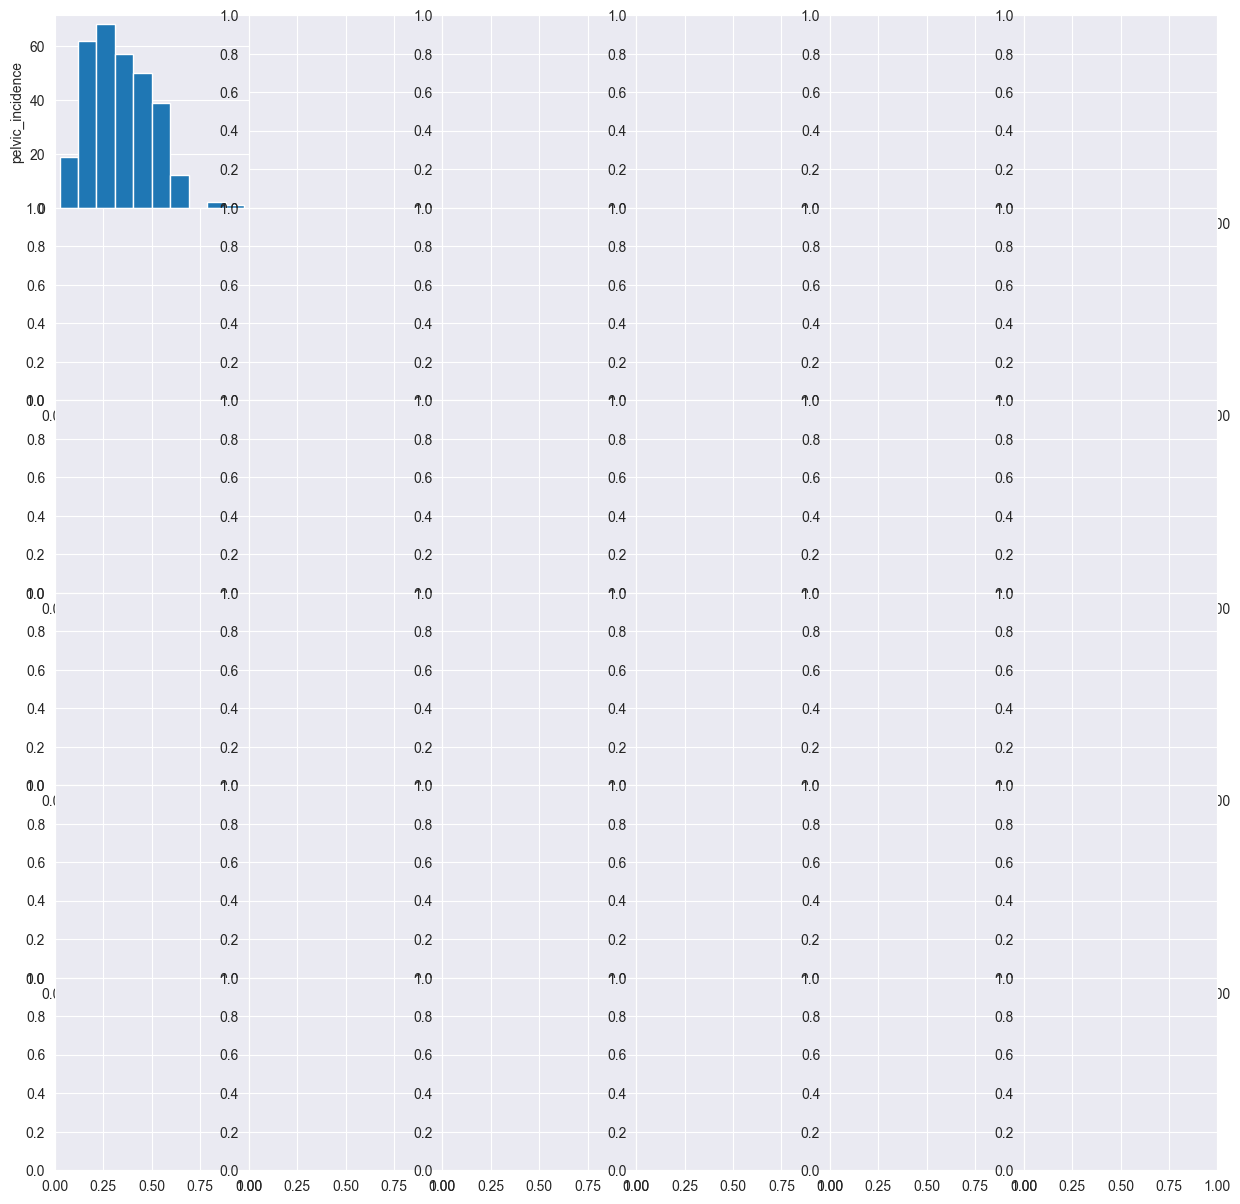

In [19]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.savefig('Scatter_matrix.png')
plt.show()



Scatter matrix  presents the relations between each feature, but how many *normal(green)* and *abnormal(red)* classes are there? 
* Searborn library has *countplot()* that counts number of classes
* Also you can print it with *value_counts()* method

<br> This data looks balanced. Actually there is no definiton or numeric value of balanced data but this data is balanced enough for us.


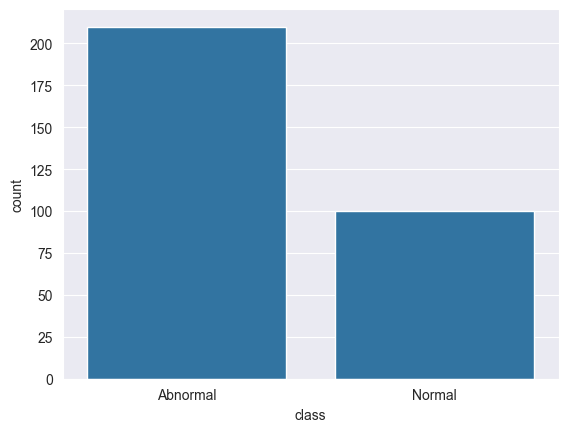

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [20]:
sns.countplot(x="class", data=data)
plt.savefig('Value_counts.png')
plt.show()
data.loc[:,'class'].value_counts()

<a id="2"></a> <br>
## 2. CLASSIFICATION: K-Nearest Neighbors (KNN)

<a id="3"></a> <br>
### 2.1 KNN

<br> Now lets learn first **classification** method KNN.
* KNN: Look at the K closest labeled data points
* First we need to train our data (Train = *fit*)
* fit(): fits the data, train the data.
* predict(): predicts the data

<br> Lets learn how to implement it with **sklearn**.
* x: features
* y: target variables (normal, abnormal)
* n_neighbors: K. In this example it is 3, it means that algorithm looks at the 3 closest labeled data points.


In [9]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
#print('Prediction: {}'.format(prediction))


<a id="4"></a> <br>
### 2.2 Accuracy

Well, we fit the data and predict it with KNN. 
Did we predict correct? What is our accuracy? 

<br> Measuring model performance:
* **Accuracy**, which is the percentage of correct predictions, is commonly used metric. 

<br> As you noticed we trained our model with x (features) and again predict labels for x (features). Yes it is absurd :) But anyway, let's see the accuracy of our predictions in this case (do we expect 100%?).


In [10]:
# Accuracy of our model trained and tested with the same data
print(knn.score(x,y))

0.9258064516129032


<a id="5"></a> <br>
### 2.3 Split train and test data

<br> In order for our tests to make sense we need to **split our data into train and test datasets**.
* train: use train dataset for fitting
* test: make prediction on test dataset
* With train and test datasets, fitted data and tested data are completely different
* train_test_split(x,y,test_size = 0.3,random_state = 1)
    * x: features
    * y: target variables (normal, abnormal)
    * test_size: percentage of test size, e.g. test_size = 0.3, meaning test size = 30% and train size = 70%
    * random_state: sets a seed; if this seed is the same number, train_test_split() produce the exact same split at each run
* fit(x_train,y_train): fit on train datasets
* score(x_test,y_test): predict and give accuracy on test datasets

In [11]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


<a id="6"></a> <br>
### 2.4 Model optimisation

<br> Now the question is why we choose K = 3 or what value we need to choose for K. The answer is in model complexity

<br> **Model complexity**:
* K has a general name - it is called a **hyperparameter** and we need to choose it's value that gives the best performace. 
* Literature says if K is **too small**, than model is **complex model** can lead to **overfit**. It means that model memorizes the train sets too well and cannot predict on test set with good accuracy.
* If K is **too big**, than model is **less complex** model can lead to **underfit**. 
* Below, we range K value from 1 to 25 (exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memorize train sets and cannot give good accuracy on test set (overfit). Also if K is more than 18, model is lead to underfit, with too low accuracy. However when K is 18 (best performance), accuracy has the highest value, of almost 88%. 



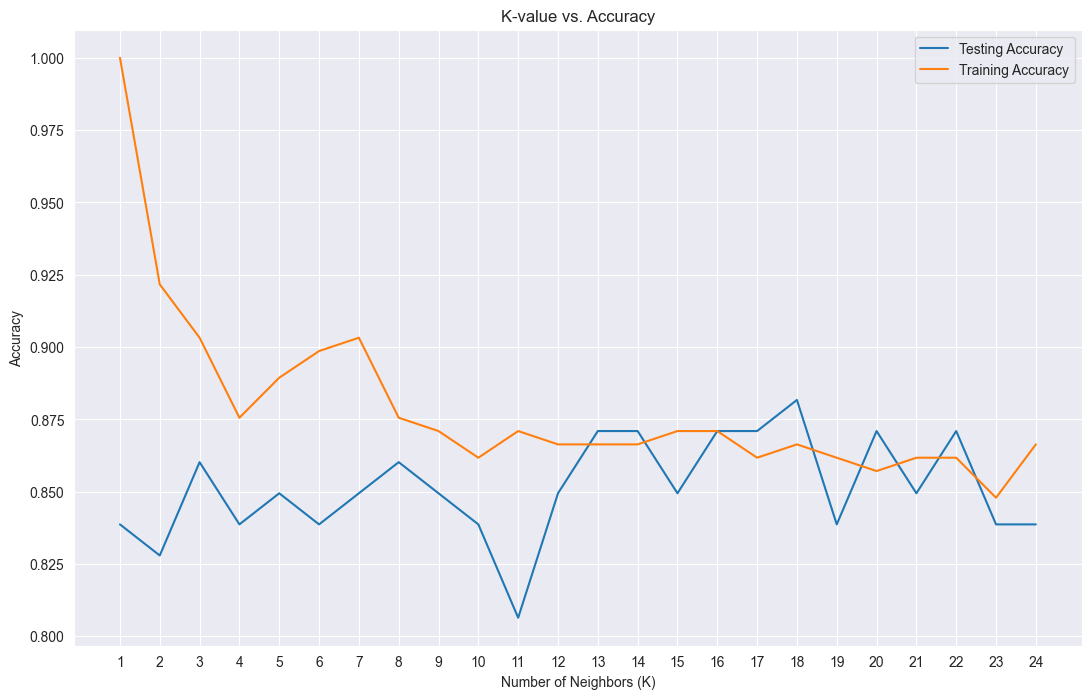

Best accuracy is 0.8817204301075269 with K = 18


In [17]:
# Model complexity
k_range = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(k_range):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value vs. Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('K-value_vs_Accuracy.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

<a id="7"></a> <br>
### 2.5 Confusion matrix

<br> Now lets discuss model performance. Is accuracy enough for measurement of model selection. For example, there is a data that includes 95% normal and 5% abnormal samples and our model uses accuracy for measurement metric. Then our model predict 100% normal for all samples and accuracy is 95% but it classifies all abnormal samples wrong. Therefore we need to use confusion matrix as a model measurement matrix in imbalance data.
Confustion matrix:
* tp = true positive(59), fp = false positive(7), fn = false negative(6), tn = true negative(21) 
* tp = Prediction is positive(normal) and actual is positive(normal). 
* fp = Prediction is positive(normal) and actual is negative(abnormal).
* fn = Prediction is negative(abnormal) and actual is positive(normal).
* tn = Prediction is negative(abnormal) and actual is negative(abnormal).
* tpr = recall = tp/(tp+fn) = true positive rate or recall
* tnr = tn/(tn+fp) = true negative rate
* ba = (tpr+tnr)/2 = balanced accuracy
* precision = tp / (tp+fp)
* f1 = 2 * precision * recall / ( precision + recall)


In [18]:
# Confusion matrix with our example
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,prediction))

Confusion matrix: 
 [[59  7]
 [ 6 21]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.91      0.89      0.90        66
      Normal       0.75      0.78      0.76        27

    accuracy                           0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



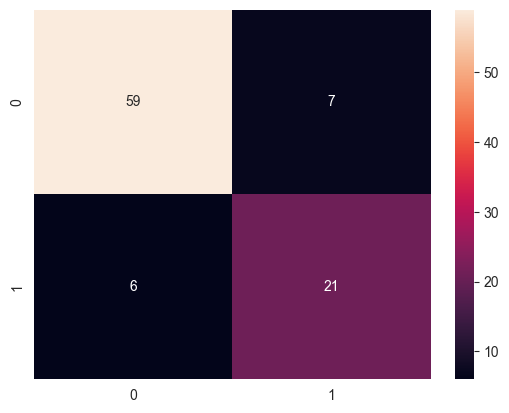

In [15]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.savefig('Confusion_matrix.png')
plt.show()

<a id="8"></a> <br>
## TODO No. 1: Random Forest (OPTIONAL)
**<br> Lets try some other classification technique - Random Forest**
* The idea and even most of the code (only KNeighborsClassifier need to be RandomForestClassifier) are the same. You need to split, fit, predict your data and measue performance and choose hyperparameter of random forest (like max_depth). 

Random Forest accuracy:  0.8387096774193549
Confusion matrix: 
 [[59  7]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.89      0.89        66
      Normal       0.73      0.70      0.72        27

    accuracy                           0.84        93
   macro avg       0.81      0.80      0.80        93
weighted avg       0.84      0.84      0.84        93



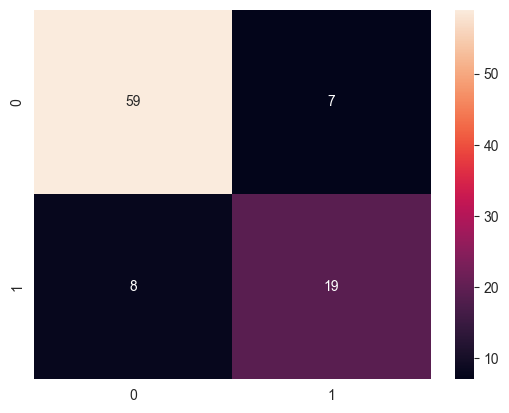

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=1)

# Fit the model
rf.fit(x_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(x_test)

# Evaluate the model
rf_accuracy = rf.score(x_test, y_test)
print('Random Forest accuracy: ', rf_accuracy)

# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print('Confusion matrix: \n', rf_cm)
print('Classification report: \n', classification_report(y_test, rf_predictions))

# Visualize the confusion matrix
sns.heatmap(rf_cm, annot=True, fmt="d")
plt.savefig('RandomForest_Confusion_matrix.png')
plt.show()

<a id="9"></a> <br>
## 3. REGRESSION
* Supervised learning (labeled data is necessary)
* The output (target) is the continuous value
* This orthopedic patients data is not proper for regression so we will only use two features that seems highly correlated based on our scatter plot matrix: *sacral_slope* and *pelvic_incidence* of abnormal data class
    * Lets consider that feature (input) is *pelvic_incidence* and target (output) is *sacral_slope* 
    * Lets look at magnified scatter plot so to understand it better
    * reshape(-1,1): If you do not use it x or y become 1D arrays with the shape (210,) and we cannot use it in sklearn, so we use reshape(-1,1) and x or y become 2D arrays with the shape (210, 1). In detail we reshape it to unknown number of raws (-1) and to 1 column.

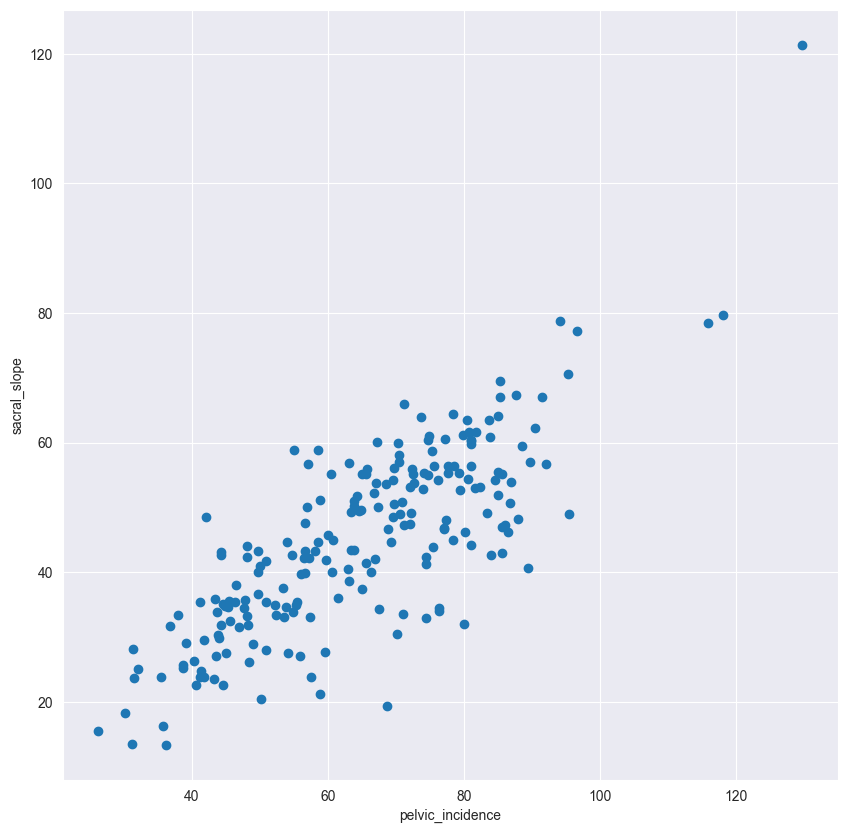

In [22]:
# Create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']

# Uncomment below if you want to see what reshape(-1,1) is about 
#xt = np.array(data1.loc[:,'pelvic_incidence'])
#print(xt.shape)
#print(xt)
#x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
#print(x.shape)
#print(x)

x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.savefig('Scatter_plot_reg.png')
plt.show()

<a id="10"></a> <br>
### 3.1 Linear Regression
Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or *sacral_slope*. Lets fit line into this points.

<br> Linear regression
* y = ax + b       where  y = target, x = feature and a = parameter of model
* We choose parameter of model (a) according to minimum error function - lost function
* In linear regression we will use Ordinary Least Square (OLS) as lost function.
* OLS: Sum all residuals but because some positive and negative residuals can cancel each other, we sum the square of residuals. 
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.6458410481075871


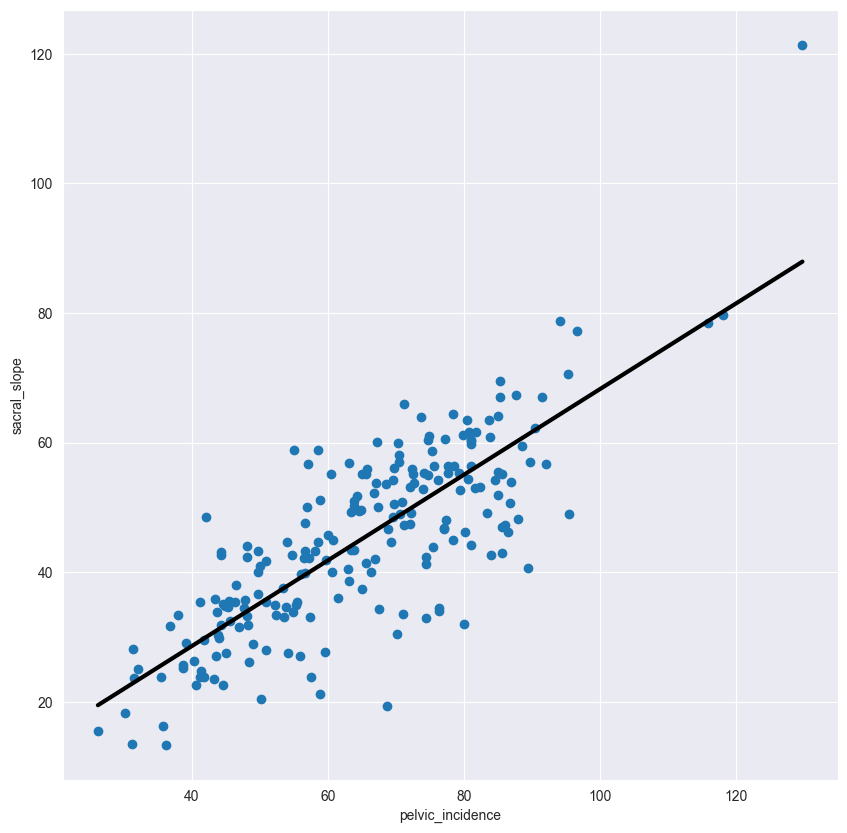

In [23]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.figure(figsize=[10,10])
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.savefig('Scatter_matrix_reg_lin.png')
plt.show()

<a id="11"></a> <br>
### 3.2 Regularized Regression
As we learned so far linear regression choose parameters (coefficients) while minimizing lost function. If linear regression considers that one of the features is important, it gives high coefficient to this feature. However, this can cause overfitting (similar to memorizing in KNN). In order to avoid overfitting, we can use regularization that penalize large coefficients.

* **Ridge regression**: First regularization technique. Also it is called L2 regularization. 
    * Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
    * Alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. So alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
    * What if alpha is zero? Lost function = OLS so it is linear rigression.
    * If alpha is too small that can cause overfitting.
    * If alpha is too big that can cause underfitting. 
* **Lasso regression**: Second regularization technique. Also it is called L1 regularization. 
    * Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
    * It can be used to select important features of the data. 
    * In order to demonstrate choosing features, we will add new features in our regression data.
    
<br> Linear vs Ridge vs Lasso
* First impression: Linear
* Feature Selection: 1.Lasso 2.Ridge
* Regression model: 1.Ridge 2.Lasso 3.Linear 



In [24]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))


TypeError: Ridge.__init__() got an unexpected keyword argument 'normalize'

In [25]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

TypeError: Lasso.__init__() got an unexpected keyword argument 'normalize'

As you can see *pelvic_incidence* and *pelvic_tilt numeric* are important features but other two are not important!


<a id="12"></a> <br>
## TODO No. 2: Regression (OPTIONAL)
**<br> Lets plot these regression methods**
* Plot scatter plots and lines on test dataset for Linear, Ridge and Lasso regression methods

<a id="12"></a> <br>
## TODO No. 2: Regression (OPTIONAL)
**<br> Lets plot these regression methods**
* Plot scatter plots and lines on test dataset for Linear, Ridge and Lasso regression methods

Linear Regression score:  1.0


NameError: name 'ridge_predict' is not defined

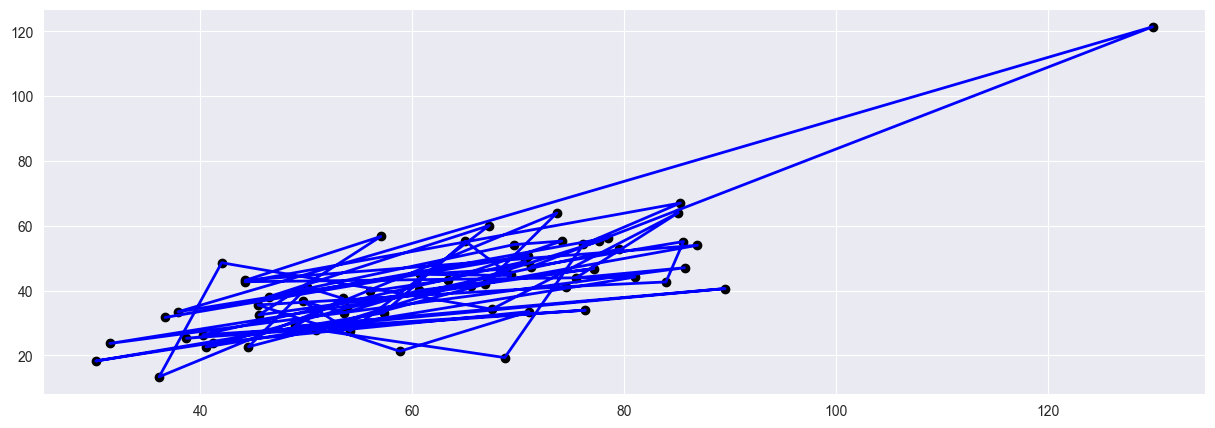

In [27]:
# Your input is expected here...

# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
linear_pred = reg.predict(x_test)
print('Linear Regression score: ', reg.score(x_test, y_test))

# Plotting
plt.figure(figsize=[15, 5])

# Scatter plot
plt.scatter(x_test[:, 0], y_test, color='black', label='Data')

# Linear Regression line
plt.plot(x_test[:, 0], linear_pred, color='blue', linewidth=2, label='Linear Regression')

# Ridge Regression line
plt.plot(x_test[:, 0], ridge_predict, color='red', linewidth=2, label='Ridge Regression')

# Lasso Regression line
plt.plot(x_test[:, 0], lasso.predict(x_test), color='green', linewidth=2, label='Lasso Regression')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Regression Methods')
plt.show()

<a id="13"></a> <br>
## 4 Logistic Regression and ROC Curve
**Logistic regression**
* Logistic regression has probabilities as the output
* If probability is higher than 0.5 data is labeled 1 (abnormal) else 0 (normal)
* By default logistic regression threshold is 0.5

**ROC curve**
* ROC is receiver operationg characteristic. In this curve x axis is false positive rate and y axis is true positive rate
* Different points on ROC correspond to different threshold values
* If the curve in plot is closer to left-top corner, test is more accurate.
* ROC curve score is AUC that is computation area under the curve from prediction scores
* We want AUC to be closer to 1
* fpr = False Positive Rate
* tpr = True Positive Rate


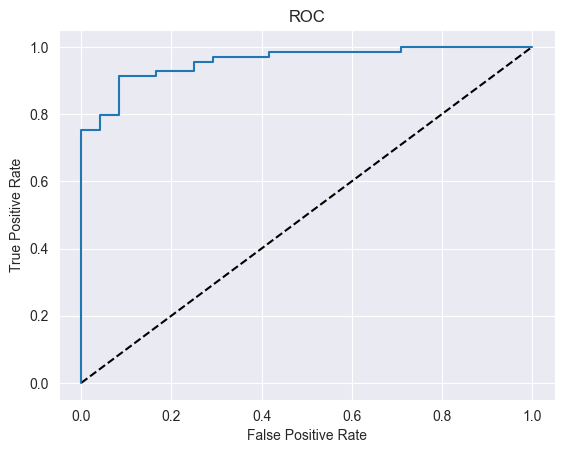

In [28]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.savefig('ROC.png')
plt.show()


<a id="14"></a> <br>
## 5. Cross validation
In KNN method we used train test split with random_state that split the dataset in exactly the same way each time. However, if we do not use random_state, data is split differently at each time and accuracy will be different. Therefore, we can conclude that model performance is dependent on the train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict? There is not certain answer but if you use cross validation you can find acceptable accuracy.
<br> Cross Validation (CV)
* K folds = K fold CV.
* When K is increased, computational cost is increased
* cross_val_score(reg,x,y,cv=5): it means 5 times (split, train, predict) for linear regression


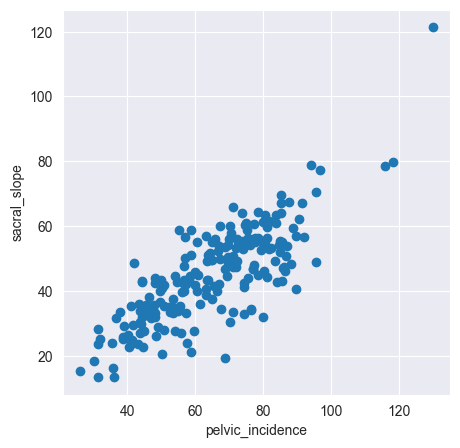

In [29]:
# (From the last time) Create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[5,5])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [30]:
# Cross Validation (CV)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


<a id="15"></a> <br>
## 6. Hyperparameter tunning
As we mentioned the last time there are hyperparameters that are need to be tuned
* For example: 
    * k at KNN
    * alpha at linear regression, Ridge and Lasso
    * max_depth at Random forest
* Hyperparameter tuning: 
    * try all combinations for different parameters
    * fit all of them
    * measure prediction performance
    * see how well each performs
    * finally choose best hyperparameters
* We only need one line code for this: GridSearchCV
    * grid: K is from 1 to 50 (exclude)
    * GridSearchCV takes knn and grid and makes grid search. It means combination of all hyperparameters. For KNN it is k.

In [31]:
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']

In [32]:
# Grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': np.int64(4)}
Best score: 0.7559434901667911


In [33]:
# Grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': np.int64(19)}
Best score: 0.8480466768138001


In [34]:
prediction = knn_cv.predict(x_test)
print(knn_cv.score(x_test,y_test))

0.8387096774193549


<a id="16"></a> <br>
### TODO No.3:  Grid search example with 2 hyperparameters
* First hyperparameter is *C*: logistic regression regularization parameter
    * If C is high: overfit
    * If C is low: underfit
* Second hyperparameter is *penalty* (loss function): l1 (Lasso) or l2 (Ridge)

In [43]:
## TODO No.3!!! 

# Grid search cross validation with 2 hyperparameter for Logistic Regression
# 1. hyperparameter is C: logistic regression regularization parameter
# 2. penalty l1 or l2
# Use hyperparameter grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x,y)

# Print the best hyperparameters and the best score
print("Tuned hyperparameters: {}".format(logreg_cv.best_params_))
print("Best score: {}".format(logreg_cv.best_score_))

Tuned hyperparameters: {'C': np.float64(1000.0), 'penalty': 'l2'}
Best score: 0.832258064516129


<a id="17"></a> <br>
## 7. Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

<a id="17"></a>
### 7.1 SVM for classification
SVC, NuSVC and LinearSVC are scikit-learn classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, accept slightly different sets of parameters and different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. 

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples).

NOTE: Support Vector Machine algorithms are not scale invariant, so it is highly recommended to **scale** your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be done easily by using a **Pipeline**.

<a id="18"></a> <br>
### TODO No. 4: Implement SVM for classification and tune hyperparameters

* Apply SVM for classification
* Scale your data
* Use Pipeline method
* Tune two hyperparameters:
    * 'SVM__C' e.g. (1,100)
    * 'SVM__gamma' e.g. (0.1, 0.01)

In [39]:
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']

In [40]:
# Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:
# estimator.get_params()

from sklearn.svm import SVC

SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Tuned hyperparameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Best score: 0.8478564180618976
Confusion matrix: 
 [[20  7]
 [ 7 59]]
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.89      0.89      0.89        66

    accuracy                           0.85        93
   macro avg       0.82      0.82      0.82        93
weighted avg       0.85      0.85      0.85        93



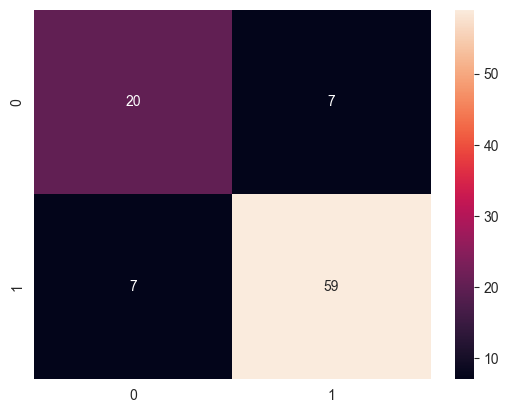

In [42]:
## TODO No.4!!!

# Apply SVC, scale, pipeline and tune 'SVM__C' and 'SVM__gamma' 

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipe = Pipeline([
	('scaler', StandardScaler()),
	('SVM', SVC())
])

# Define parameter grid
param_grid = {
	'SVM__C': [1, 10, 100],
	'SVM__gamma': [0.1, 0.01, 0.001]
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(x_train, y_train)

# Print the best parameters and the best score
print("Tuned hyperparameters: {}".format(grid.best_params_))
print("Best score: {}".format(grid.best_score_))

# Predict and evaluate the model
svm_predictions = grid.predict(x_test)
print('Confusion matrix: \n', confusion_matrix(y_test, svm_predictions))
print('Classification report: \n', classification_report(y_test, svm_predictions))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt="d")
plt.savefig('SVM_Confusion_matrix.png')
plt.show()



<a id="17"></a> <br>
### 7.2 SVM for regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

There are three different implementations of Support Vector Regression in scikit-learn: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values

<a id="19"></a> <br>
### TODO No. 5: Implement SVM for regression

* Apply SVM for regression
* Scale your data
* Use Pipeline method

* Tune three hyperparameters:
    * kernel e.g. {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} 
    * 'SVM__C' e.g. (1,100)
    * 'SVM__gamma' e.g. (0.1, 0.01)

In [41]:
from sklearn.svm import SVR

SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

c:\Users\mayow\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tuned hyperparameters: {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
Best score: 0.48787068121721217
SVR R^2 score:  0.4356811022607975


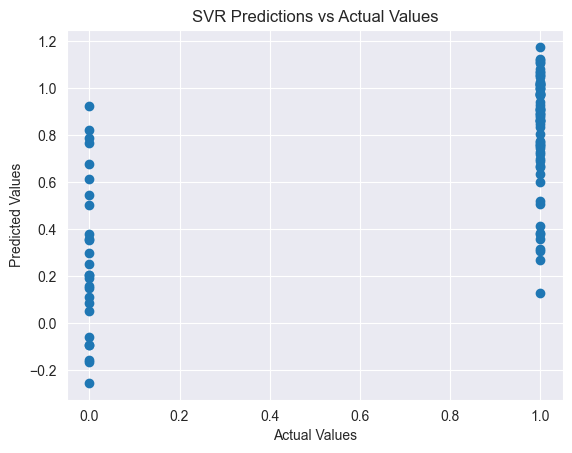

In [44]:
## TODO No.5!!!

# Apply SVR, scale, pipeline and tune 'SVM__kernel' 'SVM__C' and 'SVM__gamma'

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipe = Pipeline([
	('scaler', StandardScaler()),
	('SVM', SVR())
])

# Define parameter grid
param_grid = {
	'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
	'SVM__C': [1, 10, 100],
	'SVM__gamma': [0.1, 0.01, 0.001]
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(x_train, y_train)

# Print the best parameters and the best score
print("Tuned hyperparameters: {}".format(grid.best_params_))
print("Best score: {}".format(grid.best_score_))

# Predict and evaluate the model
svr_predictions = grid.predict(x_test)
print('SVR R^2 score: ', grid.score(x_test, y_test))

# Visualize the predictions
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Predictions vs Actual Values')
plt.savefig('SVR_Predictions.png')
plt.show()

## Attributions and License:

Notebook based on [https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook].

This work is licensed under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0) open source license.